# Wine Quality Dataset

The task is to explore the *Wine Quality* dataset in order to extract the main features and characteristics from the data and predict the wine quality.
We will consider this problem as a regression task.

* [Exploratory Data Analysis](#eda)
* [Data preprocessing](#prepro)
* [Quality prediction](#qp)

## Dependencies

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

## Exploratory Data Analysis<a name="eda"></a>

I merge the white and red wine datasets to make it easier to explore and preprocess.

In [69]:
# Import data
whites = pd.read_csv('./data/winequality-white.csv', sep=';')
reds = pd.read_csv('./data/winequality-red.csv', sep=';')

# Check if the two datasets have the same columns
assert all(r == w for r, w in zip(whites.columns, reds.columns))

# Concatenate the 2 datasets
whites['type'] = 'white'
reds['type'] = 'red'
wines = pd.concat([whites, reds]).sample(frac=1).reset_index(drop=True)  # Shuffling data
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.30,0.22,5.25,0.053,33.0,180.0,0.99260,3.13,0.45,11.6,6,white
1,6.3,0.22,0.34,5.00,0.032,36.0,93.0,0.99012,3.27,0.36,13.5,7,white
2,6.6,0.58,0.02,2.00,0.062,37.0,53.0,0.99374,3.35,0.76,11.6,7,red


In [70]:
print(f'wines.shape : {wines.shape}')
print(f'\nwines.dtype : \n{wines.dtypes}')

wines.shape : (6497, 13)

wines.dtype : 
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object


In [71]:
print(f'Which columns contain nan values ? \n{wines.isnull().sum()}')

Which columns contain nan values ? 
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [72]:
print(f"Before dropping duplicates : {wines.shape}")
wines = wines.drop_duplicates()
print(f'After dropping duplicates : {wines.shape}')

Before dropping duplicates : (6497, 13)
After dropping duplicates : (5320, 13)


### Analysing target variable

Text(0.5, 0, 'Quality')

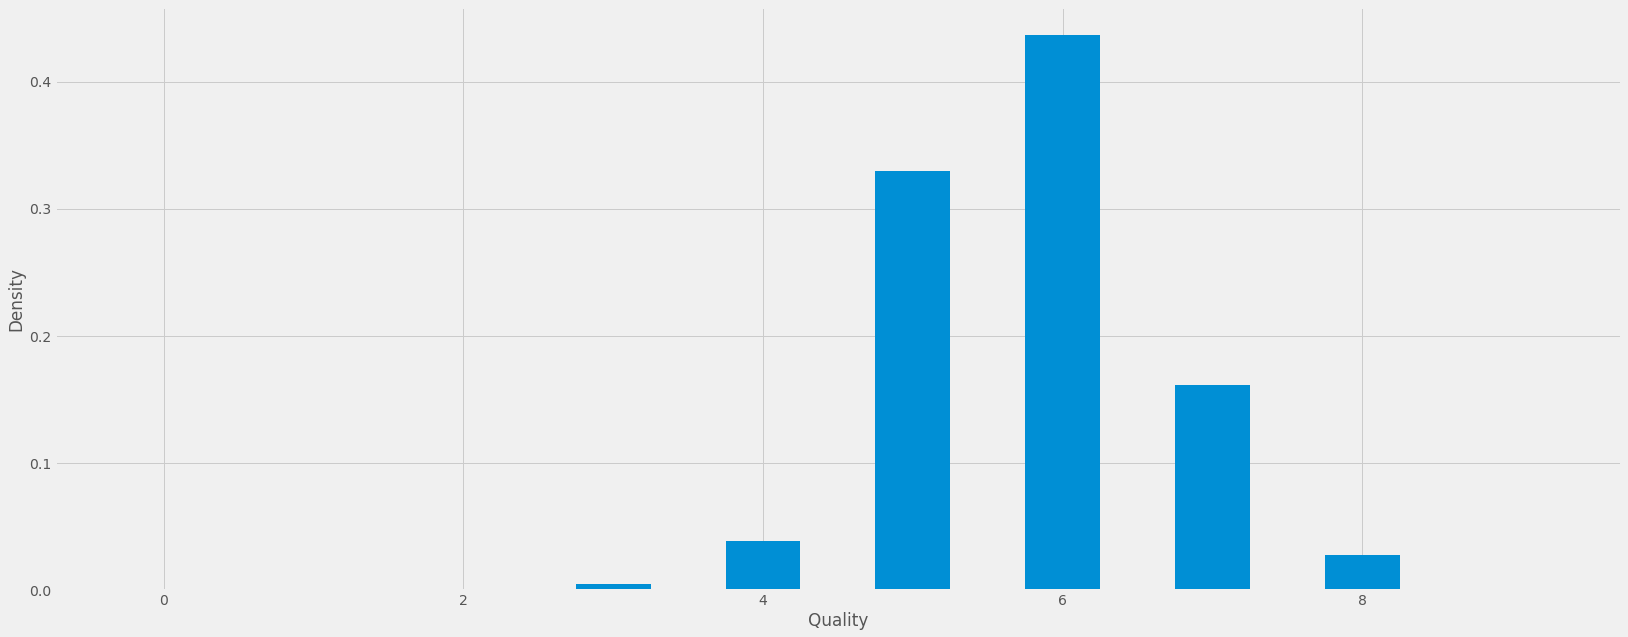

In [139]:
_, ax = plt.subplots(figsize=(25, 10))
wines['quality'].hist(bins=np.arange(11)-0.5, rwidth=0.5, ax=ax, density=True)
ax.set_ylabel('Density')
ax.set_xlabel('Quality')

* More than 40% of the data are rated as 6.
* We can distinguish a normal distribution.

### Univariate analysis

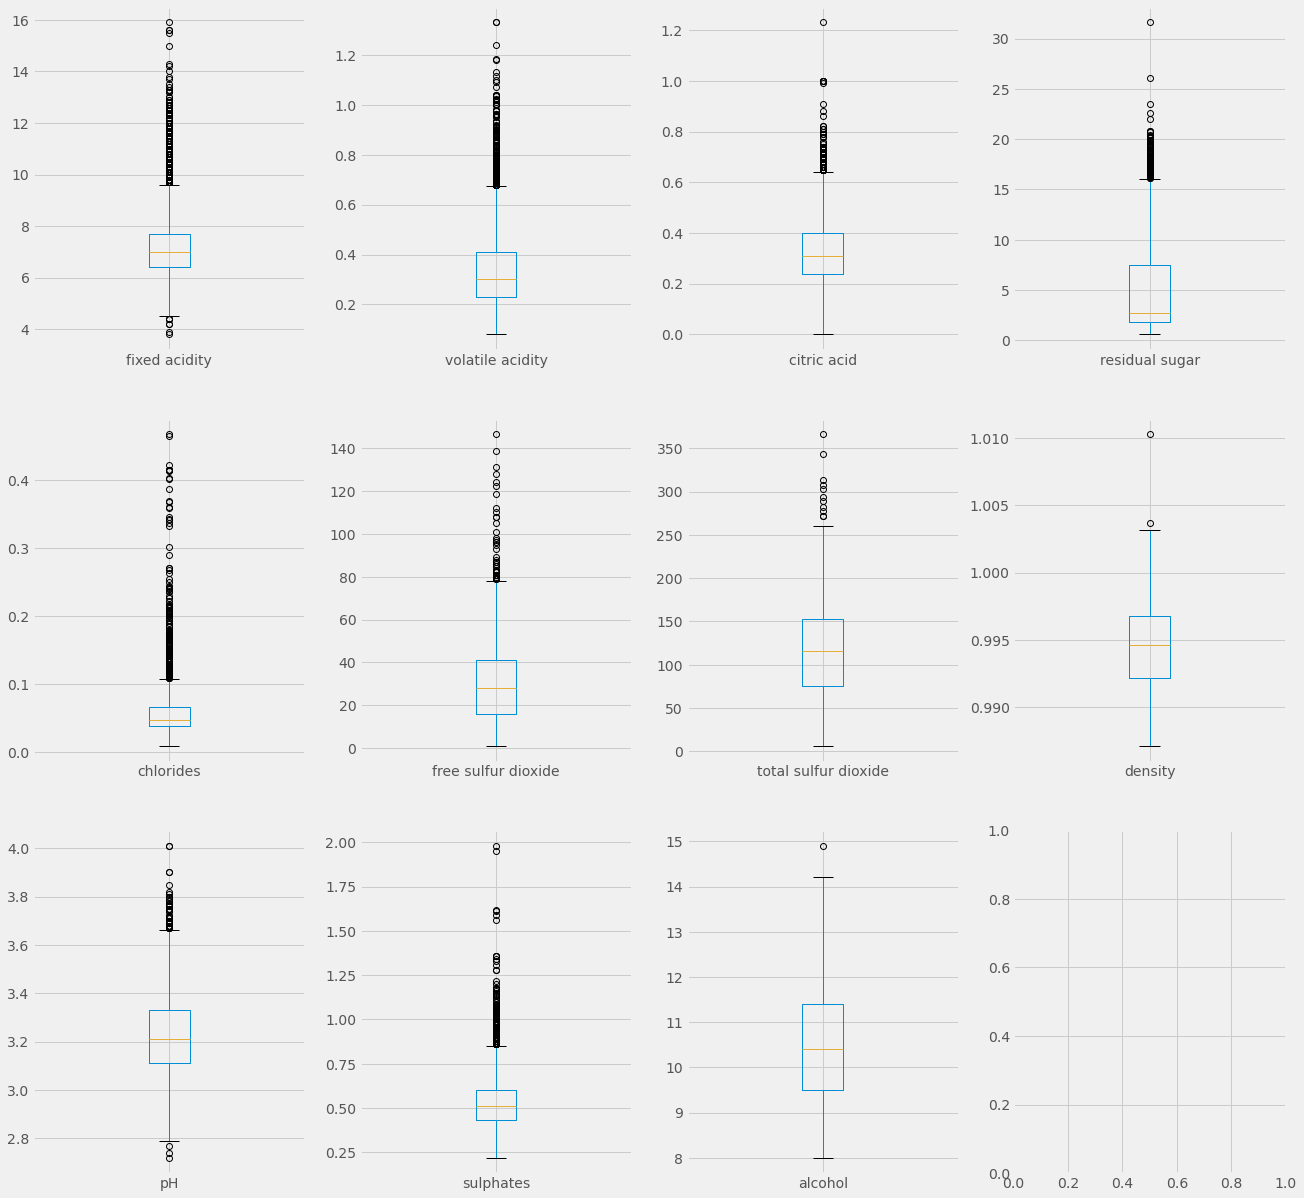

In [124]:
fig, axs = plt.subplots(3, 4, figsize=(20, 20))
axs = axs.ravel()
continuous_features = list(wines.columns)
continuous_features.remove('quality')
continuous_features.remove('type')

for ax, colname in zip(axs, continuous_features):
    wines[colname].plot.box(ax=ax)

We can see several outliers which have to be removed from the dataset in order to not skew futur analysis. The columns which have to be processed are :
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* density
* total sulfur dioxide

In [75]:
# Removing outliers
print(f"Before removing outliers {wines.shape}")
wines = wines[wines['volatile acidity'] <= 1.4]
wines = wines[wines['citric acid'] <= 1.5]
wines = wines[wines['residual sugar'] <= 50]
wines = wines[wines['chlorides'] <= 0.5]
wines = wines[wines['free sulfur dioxide'] <= 200]
wines = wines[wines['density'] <= 1.02]
wines = wines[wines['total sulfur dioxide'] <= 400]
print(f"After removing outliers {wines.shape}")

Before removing outliers (5320, 13)
After removing outliers (5314, 13)


Text(0.5, 1.0, 'Proportion of wine according to its type')

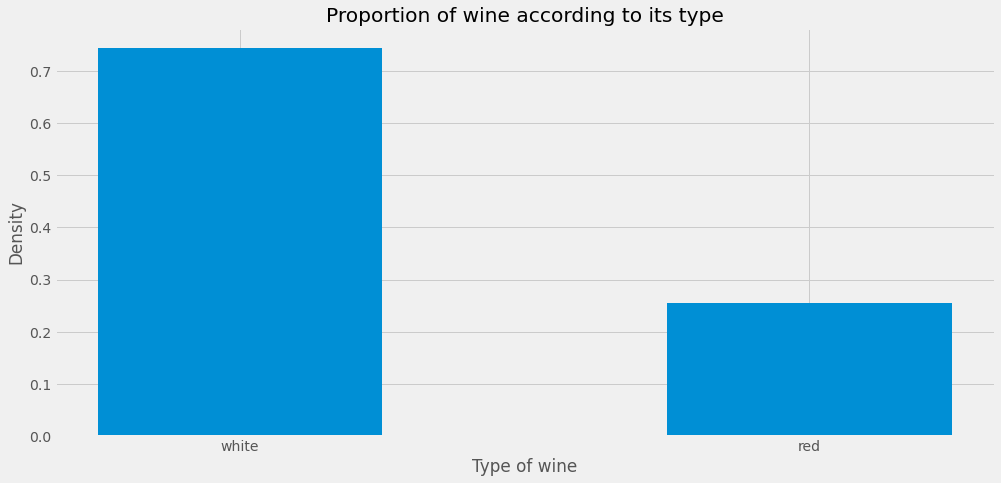

In [125]:
fig, ax = plt.subplots(figsize=(15, 7))
wines['type'].hist(bins=np.arange(3)-0.5, rwidth=0.5, ax=ax, density=True)
ax.set_ylabel('Density')
ax.set_xlabel('Type of wine')
ax.set_title("Proportion of wine according to its type")

* White wines represents 74% of the data.
* Red wines represents 27% of the data. 

Text(0.5, 0.98, 'Univariate analysis on continuous variables')

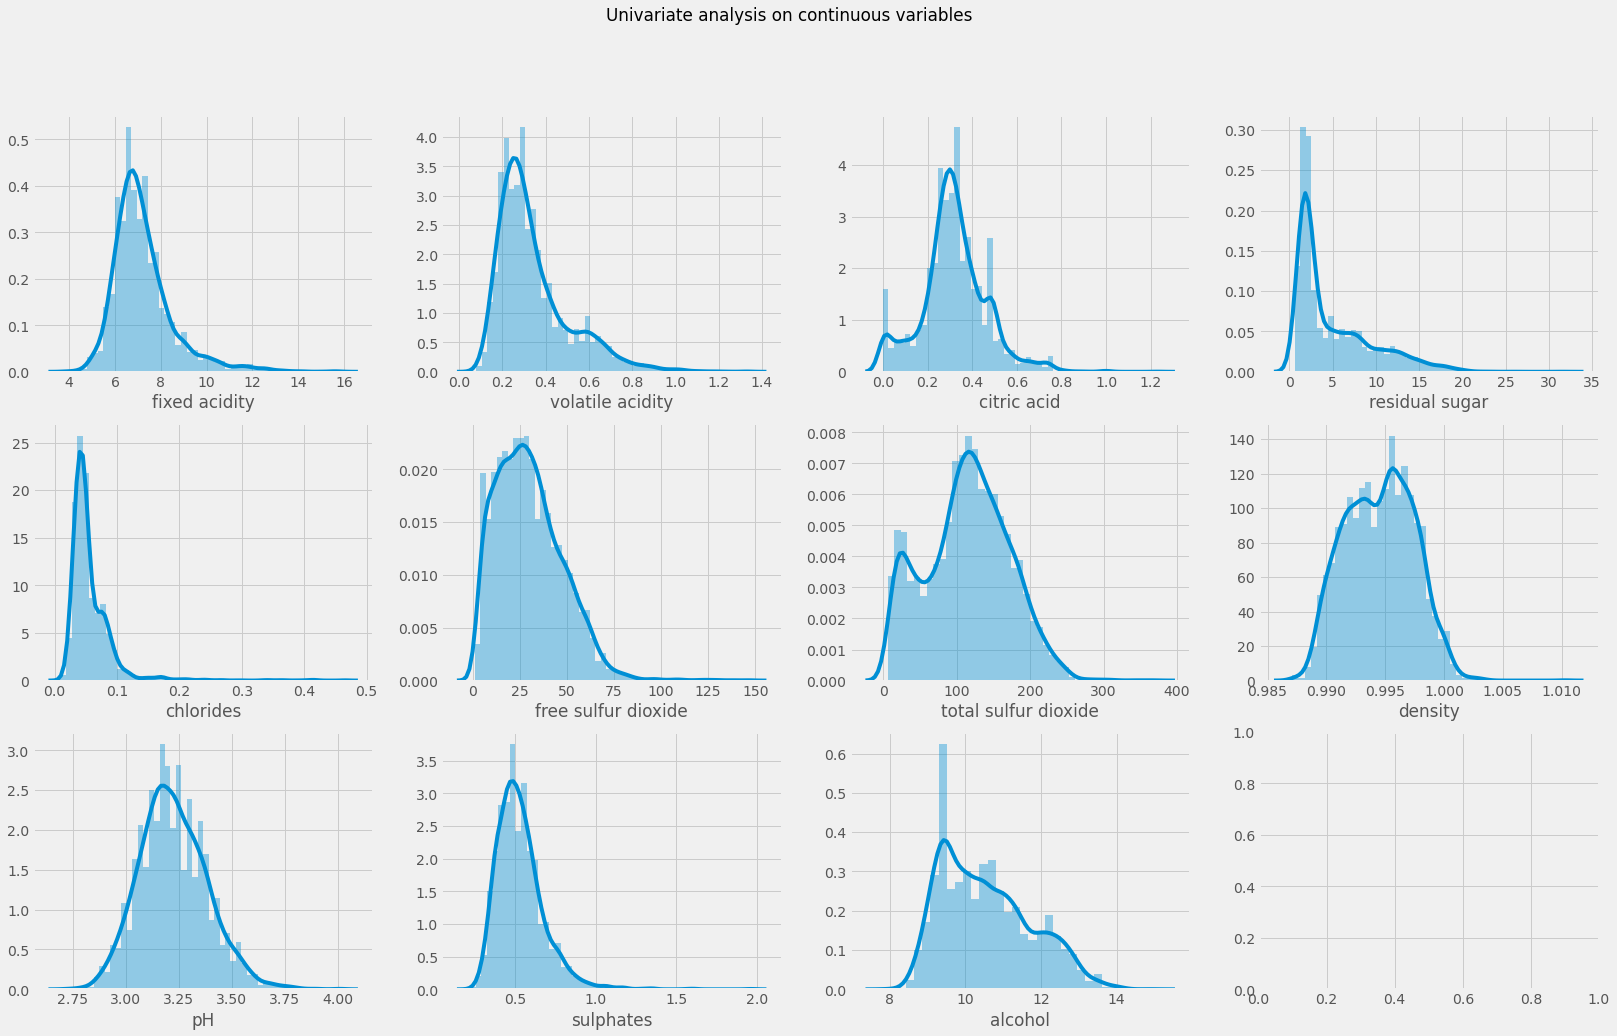

In [126]:
fig, axs = plt.subplots(3, 4, figsize=(25, 15))
axs = axs.ravel()

for ax, colname in zip(axs, continuous_features):
    sns.distplot(wines[colname], ax=ax)
    
plt.suptitle('Univariate analysis on continuous variables')

### Bivariate analysis

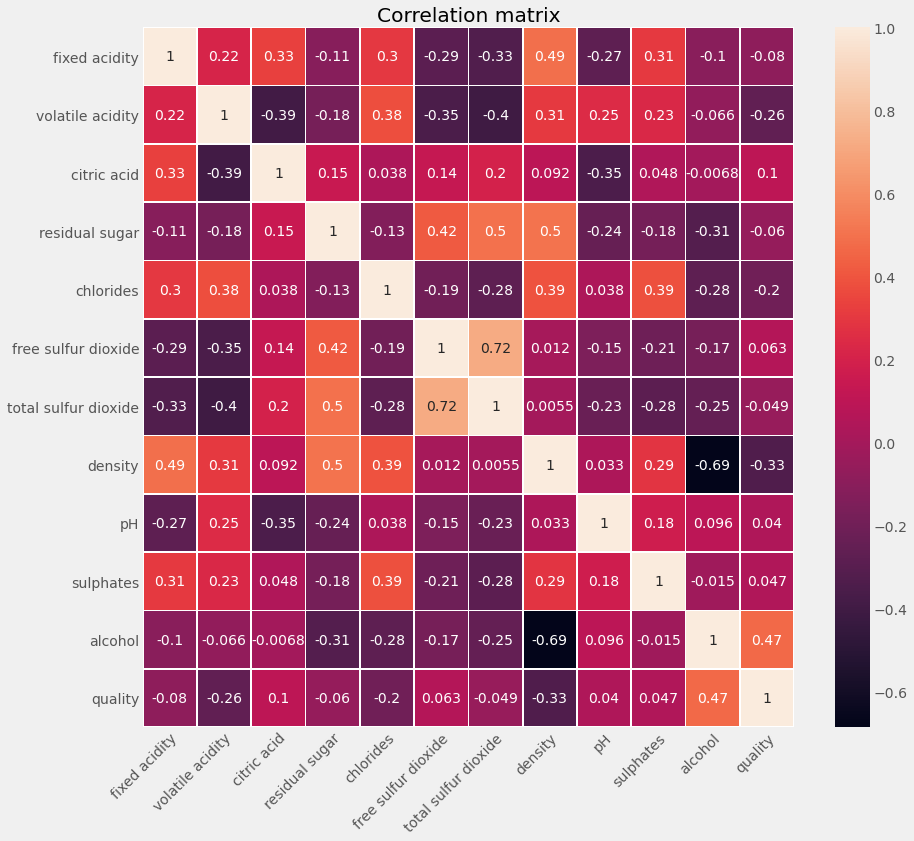

In [127]:
fig, ax = plt.subplots(figsize=(13, 12))
corr_matrix = wines.corr()
sns.heatmap(corr_matrix.values, annot=True, ax=ax, linewidth=0.8)

# Ticks parameters
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax.get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")

_ = ax.set_title("Correlation matrix")

* Quality and alcohol variables are pretty much correlated
* There is a high (negative) correlation between density and alcohol
* The residual sugar is correlated with the total sulfur dioxide and density
* Free sulfure dioxide and total sulfur dioxide are highly correlated
* Citric acid, pH, fixed acidity and sulphates have little impact on the wine quality

Since, correlation can only measure a linear dependency between variables, I will also display the relationship between continuous variables. Since there are not too much variables, let's use *scatter_matrix* from pandas.

Text(0.5, 0.98, 'Relationship between continuous variables')

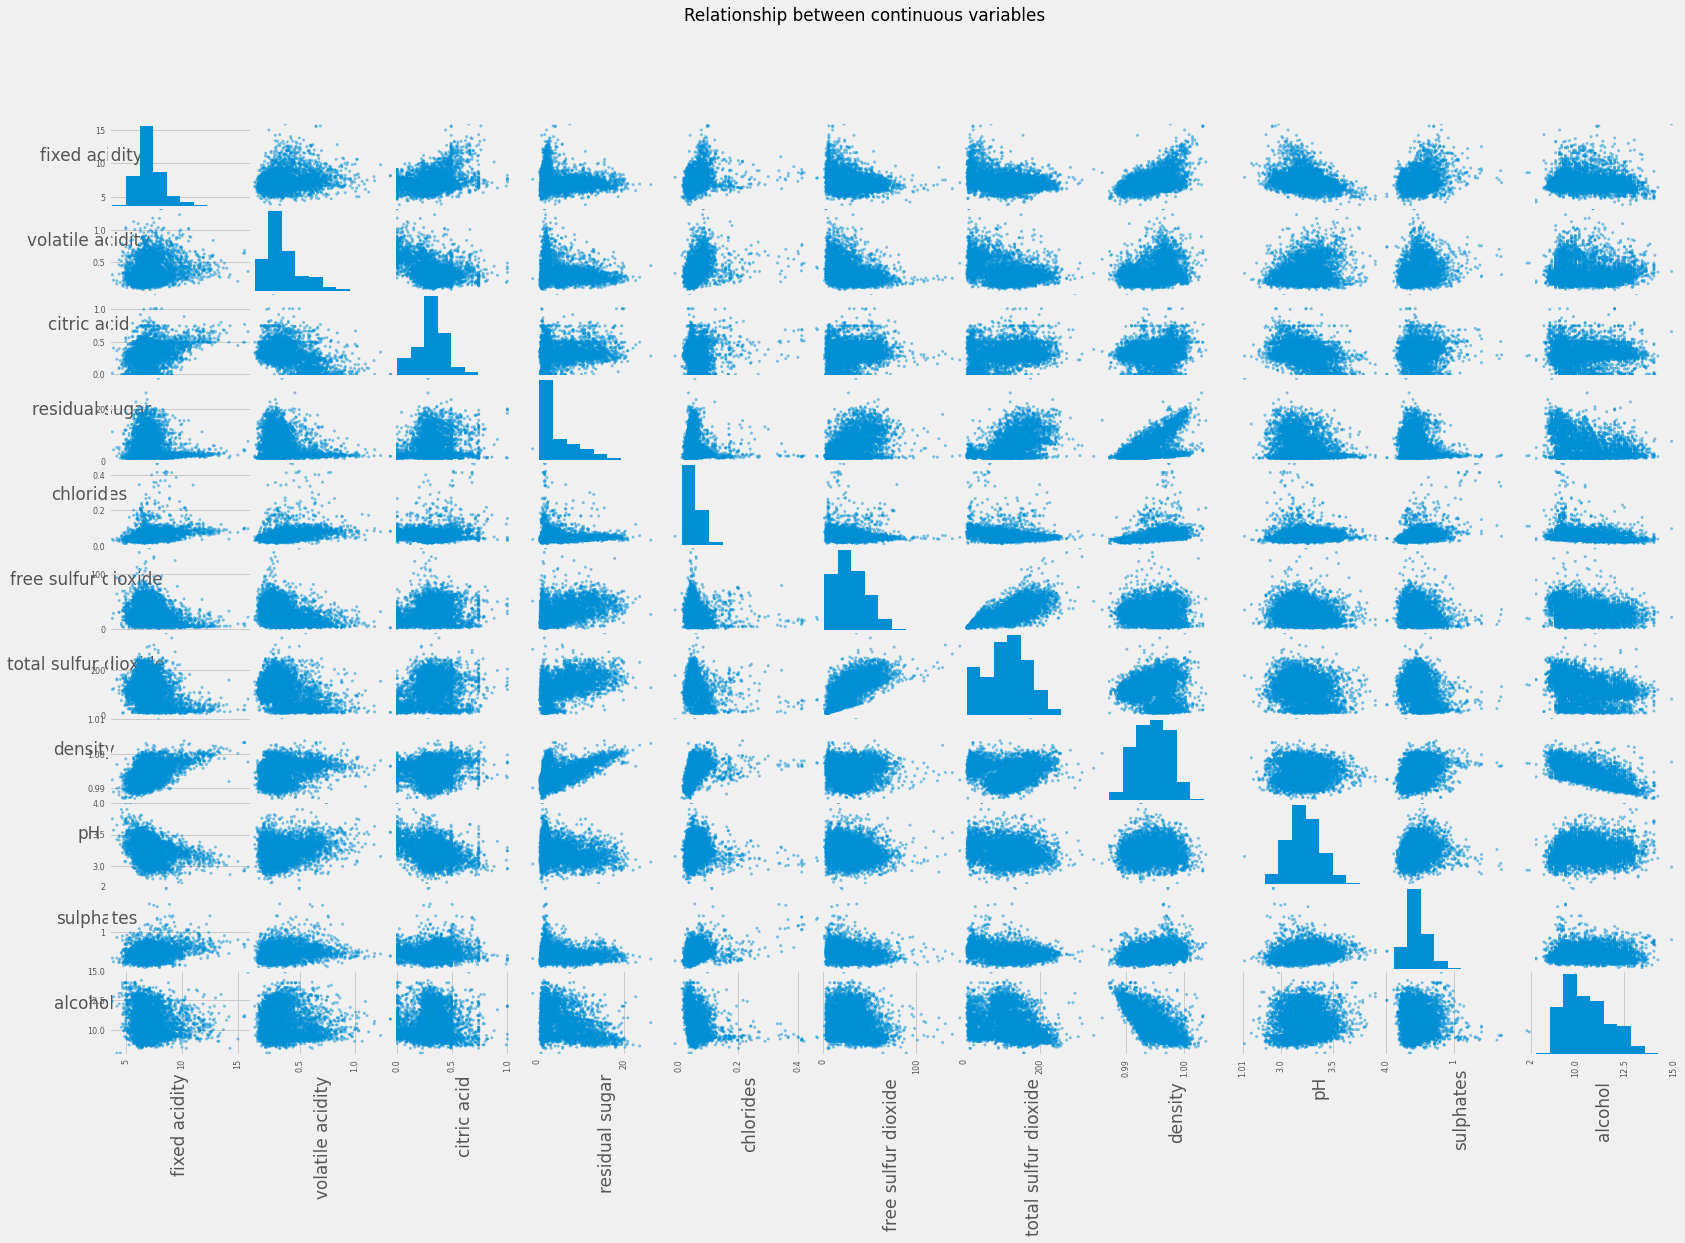

In [128]:
axs = pd.plotting.scatter_matrix(wines[continuous_features], figsize=(25, 16))

for ax in axs.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)
    ax.set_ylabel(ax.get_ylabel(), rotation=0)
    
plt.suptitle("Relationship between continuous variables")

* Density and residual sugar seem to have a specific type of correlation : low residual sugar wines can have any density value while higher residual sugar wines are linearly correlated to their residual sugar value.

Text(0.5, 0.98, 'Relationship between quality and continuous variables')

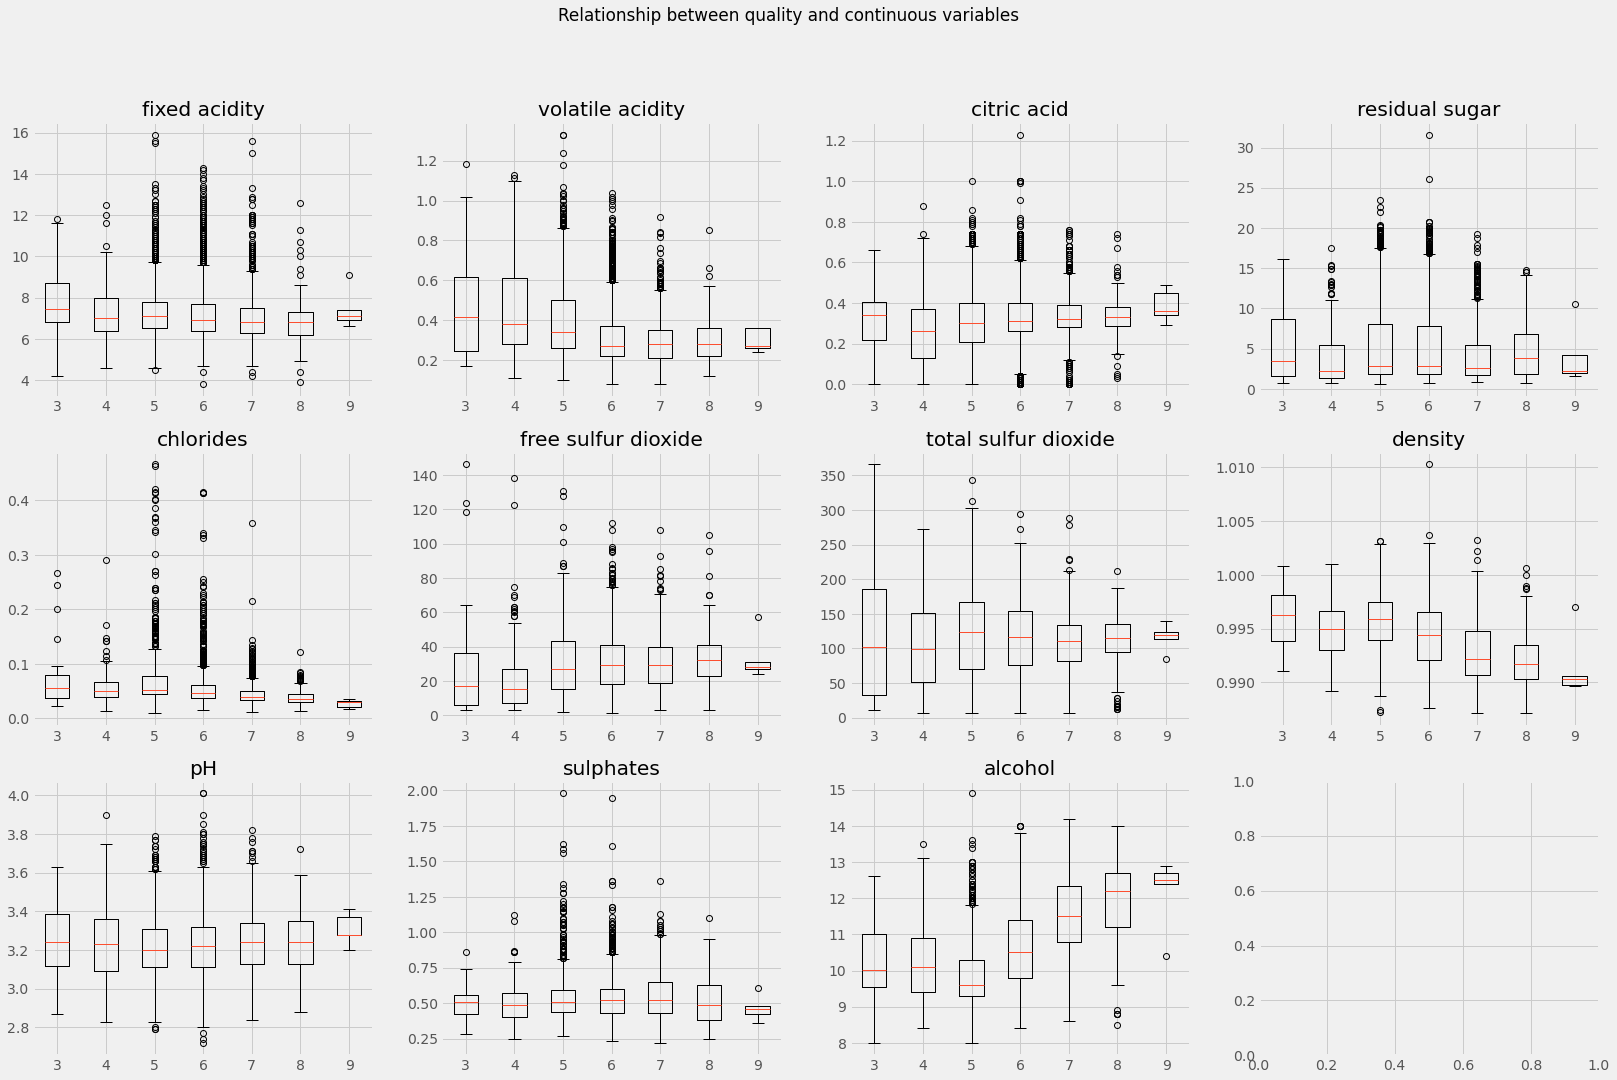

In [129]:
fig, axs = plt.subplots(3, 4, figsize=(25, 16))
axs = axs.ravel()
qualities = sorted(wines['quality'].unique())

for ax, colname in zip(axs, continuous_features):
    ax.boxplot([wines[wines['quality'] == i][colname] for i in qualities])
    ax.set_xticklabels(qualities)
    ax.set_title(colname)
    
plt.suptitle('Relationship between quality and continuous variables')

* Still find a linear correlation with density and alcohol as seen before
* Volatile acidity seems to converge to 0.3 as the wine quality increase.
* Total sulfur dioxide seems to converge to 120 as the wine quality increase.

Text(0.5, 0, 'Type of wine')

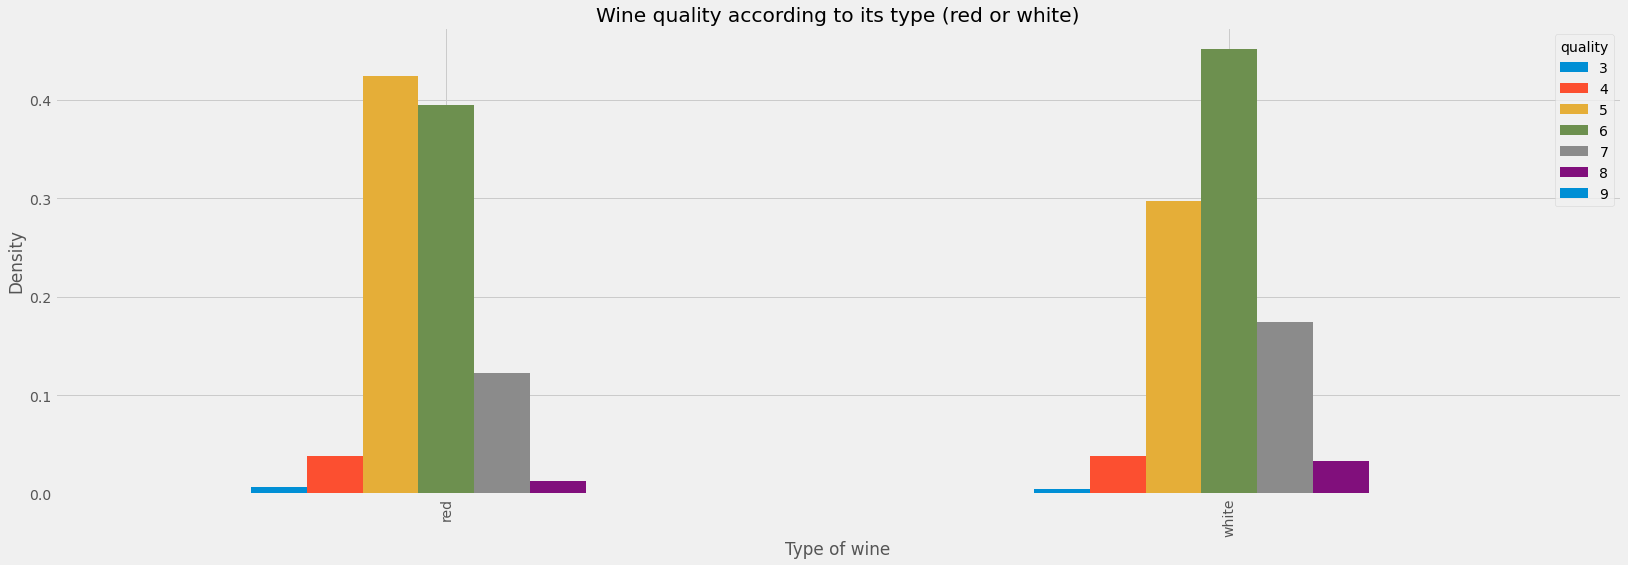

In [130]:
fig, ax = plt.subplots(figsize=(25, 8))
tab = pd.crosstab(wines['type'], wines['quality'])
tab.div(tab.sum(axis=1), axis=0).plot.bar(ax=ax)
ax.set_title("Wine quality according to its type (red or white)")
ax.set_ylabel('Density')
ax.set_xlabel('Type of wine')

* White wines are usually rated as 6 and red wines are usually rated as 5 or 6.
* White wines have a higher proportion of good quality wines (> 6).
* Both type of wines have the same proportion of low quality wines (< 5).

### Clusters

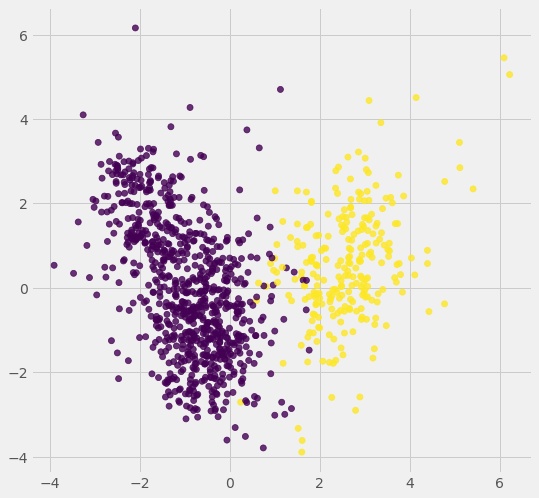

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
std_scaler = StandardScaler()
pca = PCA(2)

# Standardize & project data on a 2-dimensional plane
types = (wines['type']=='red').astype(int).values
scaled_wines = std_scaler.fit_transform(wines[continuous_features])
twodim_wines = pca.fit_transform(scaled_wines)

# Display data
fig, ax = plt.subplots(figsize=(8, 8))
n = int(0.2 * wines.shape[0])
plt.scatter(twodim_wines[:n,0], twodim_wines[:n,1], c=types[:n], alpha=.8, linewidth=.8)

* Data can be separated in two clusters
* Each cluster is likely to represent a wine type (red or white).

## Data preprocessing<a name="prepro"></a>

Outliers have already been removed.

The type variable will be one-hot encoded and the continuous variable will be standardized.

In [83]:
# One-hot encode type
ohe_types = pd.get_dummies(wines['type'])

In [84]:
from sklearn.model_selection import train_test_split

std_scaler = StandardScaler()
scaled_wines = std_scaler.fit_transform(wines[colnames])
X = np.concatenate([scaled_wines, ohe_types], axis=1)  # Add 2 more columns to describe wine type
y = wines['quality'].values
print(f"Data shape : {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")

Data shape : (5314, 13)
X_train shape : (4251, 13)
X_test shape : (1063, 13)


## Quality prediction<a name="qp"></a>

The metric used is the *Root Mean Squared Error*. Let's create a dummy model first in which the final model can be compared with.

In [116]:
# Create a dummy model to compare
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error as MSE

dummy = DummyRegressor(strategy='median')
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
score = MSE(y_pred, y_test) ** 0.5

print(f'RMSE : {score}')

RMSE : 0.9031147106657517


In [97]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

depths = list(range(2, 50, 5))
scores = []

for depth in depths:
    print(f'Testing depth={depth}')
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = MSE(y_pred, y_test) ** 0.5
    scores.append(score)

Testing depth=2
Testing depth=7
Testing depth=12
Testing depth=17
Testing depth=22
Testing depth=27
Testing depth=32
Testing depth=37
Testing depth=42
Testing depth=47


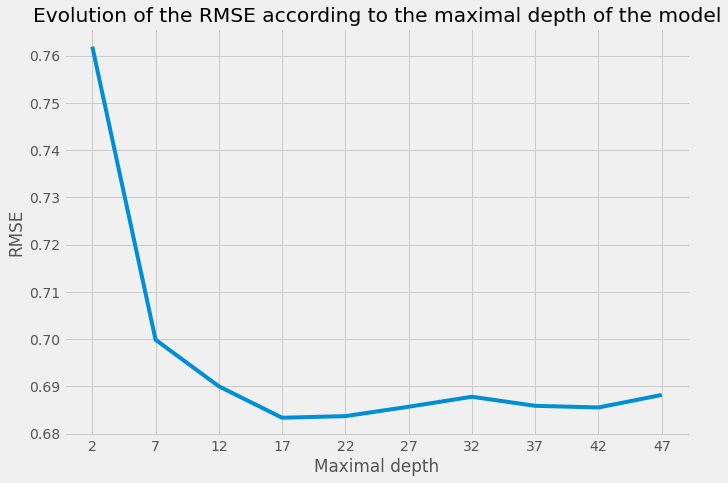

In [132]:
plt.figure(figsize=(10, 7))
plt.plot(depths, scores)
plt.title('Evolution of the RMSE according to the maximal depth of the model')
plt.ylabel('RMSE')
plt.xlabel('Maximal depth')
_ = plt.xticks(depths)

The best RandomForest model is found with a maximum depth set at 17. After this value, the RMSE score starts to increase which means that the model is overfitting on the training data.

Such a model gives a RMSE score of 0.685 and outperforms the dummy model.